# Exploratory Visualization of the Cars Dataset

## Imports

In [1]:
import pandas as pd
from altair import *

## Load the dataset

In [2]:
cars = load_dataset('cars')

In [3]:
cars.head()

,Acceleration,Cylinders,Displacement,Horsepower,Miles_per_Gallon,Name,Origin,Weight_in_lbs,Year
0,12.0,8,307.0,130.0,18.0,chevrolet chevelle malibu,USA,3504,1970
1,11.5,8,350.0,165.0,15.0,buick skylark 320,USA,3693,1970
2,11.0,8,318.0,150.0,18.0,plymouth satellite,USA,3436,1970
3,12.0,8,304.0,150.0,16.0,amc rebel sst,USA,3433,1970
4,10.5,8,302.0,140.0,17.0,ford torino,USA,3449,1970


## Exploration

First, let's explore what makes a car perform well. In this case, the `Acceleration` column will be used as proxy for performance. First, let's look at how acceleration is related to weight and the number of cylinders:

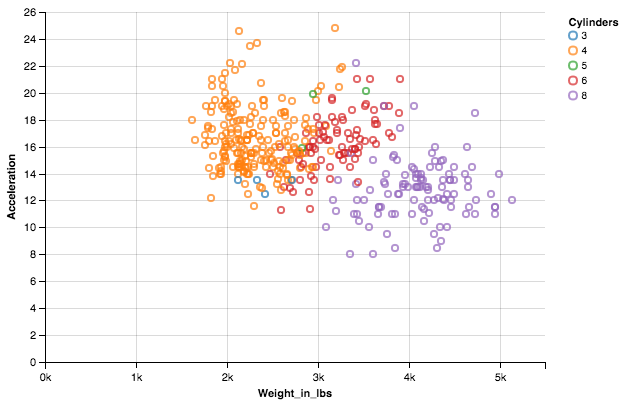

In [4]:
Layer(cars).encode(
    x='Weight_in_lbs',
    y='Acceleration',
    color='Cylinders:N'
).mark_point()

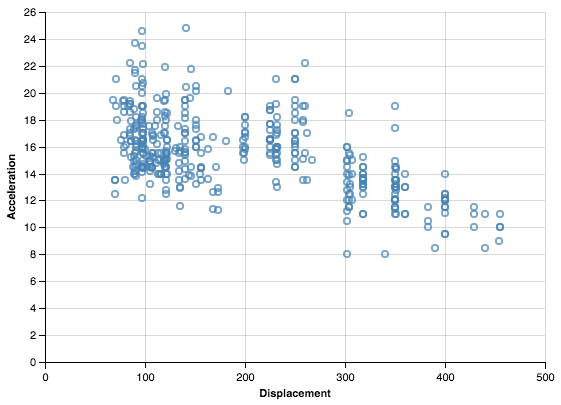

In [5]:
Layer(cars).encode(
    x='Displacement',
    y='Acceleration',
).mark_point()

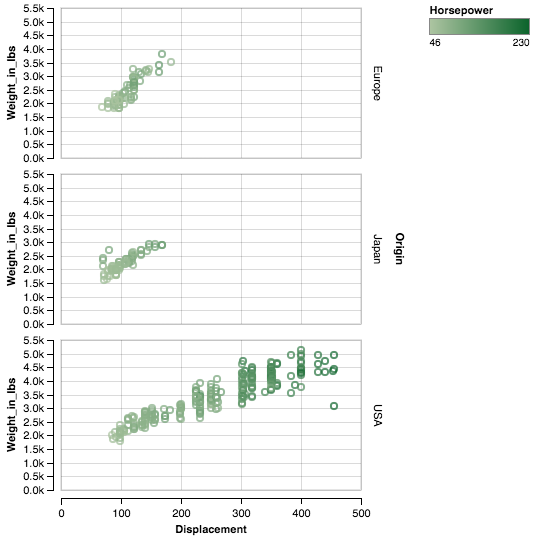

In [6]:
Layer(cars).encode(
    x='Displacement',
    y='Weight_in_lbs',
    color='Horsepower',
    row='Origin'
).configure(
    cell=CellConfig(width=300, height=150)   
).mark_point()

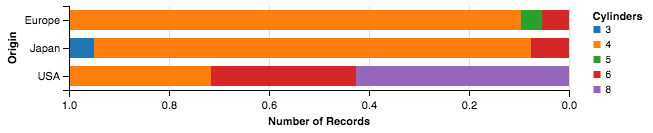

In [7]:
Layer(cars).encode(
    Y('Origin'),
    X('*:Q', aggregate='count', sort='descending'),
    Color('Cylinders:N')
).configure(
  mark=MarkConfig(stacked="normalize")    
).mark_bar()

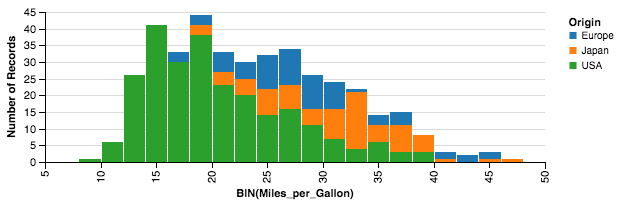

In [8]:
Layer(cars).encode(
    X('Miles_per_Gallon', bin=Bin(maxbins=20)),
    Y('*:Q', aggregate='count'),
    Color('Origin')
).configure(
    cell=CellConfig(height=150)
).mark_bar()

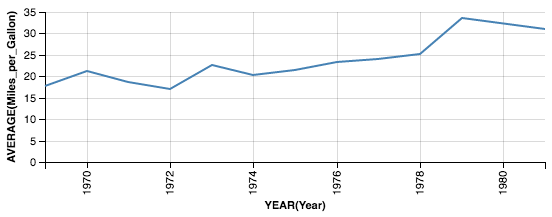

In [9]:
Layer(cars).encode(
    X('Year:T', timeUnit='year'),
    Y('Miles_per_Gallon:Q', aggregate='average')
).configure(
    cell=CellConfig(height=150)
).mark_line()